# Table of Contents
 <p><div class="lev1"><a href="#A-Heatmap-on-the-United-States"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Heatmap on the United States</a></div>

A Heatmap on the United States
==============================

In [1]:
murders <- read.csv("murders.csv")

In [2]:
str(murders)

'data.frame':	51 obs. of  6 variables:
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Population       : int  4779736 710231 6392017 2915918 37253956 5029196 3574097 897934 601723 19687653 ...
 $ PopulationDensity: num  94.65 1.26 57.05 56.43 244.2 ...
 $ Murders          : int  199 31 352 130 1811 117 131 48 131 987 ...
 $ GunMurders       : int  135 19 232 93 1257 65 97 38 99 669 ...
 $ GunOwnership     : num  0.517 0.578 0.311 0.553 0.213 0.347 0.167 0.255 0.036 0.245 ...


In [9]:
library(ggplot2)
library(maps)
library(ggmap)

In [5]:
statesMap <- map_data("state")

In [7]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


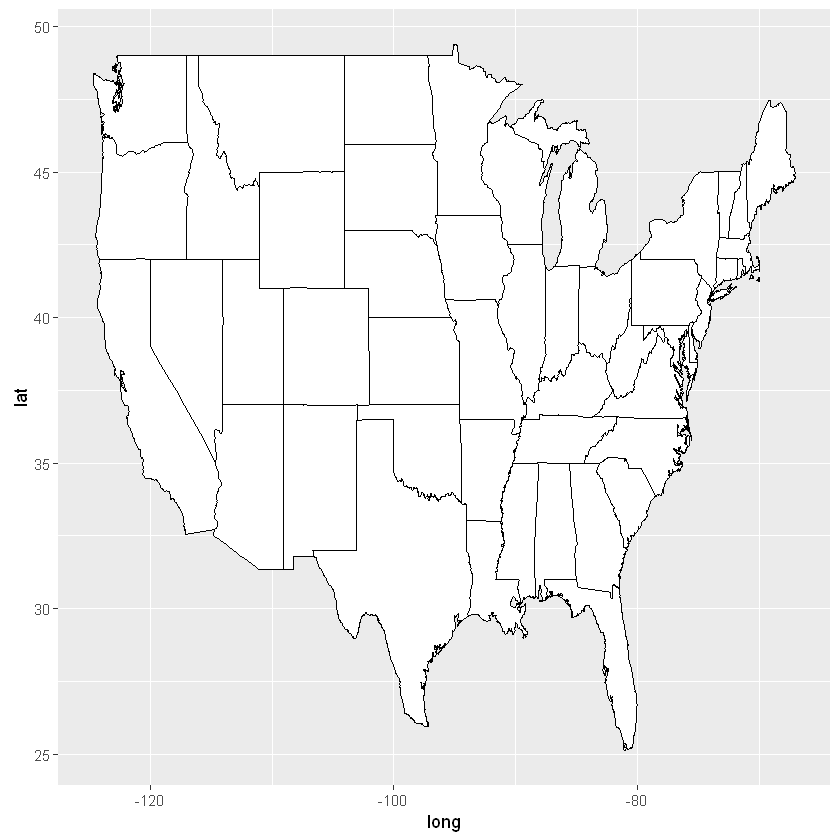

In [13]:
ggplot(statesMap, aes(x=long, y=lat, group=group)) +
geom_polygon(fill="white", color="black")

In [14]:
murders$region <- tolower(murders$State)

In [15]:
murderMap <- merge(statesMap, murders, by="region")

In [16]:
str(murderMap)

'data.frame':	15537 obs. of  12 variables:
 $ region           : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ long             : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat              : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ subregion        : chr  NA NA NA NA ...
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Population       : int  4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 ...
 $ PopulationDensity: num  94.7 94.7 94.7 94.7 94.7 ...
 $ Murders          : int  199 199 199 199 199 199 199 199 199 199 ...
 $ GunMurders       : int  135 135 135 135 135 135 135 135 135 135 ...
 $ GunOwnership     : num  0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 ...


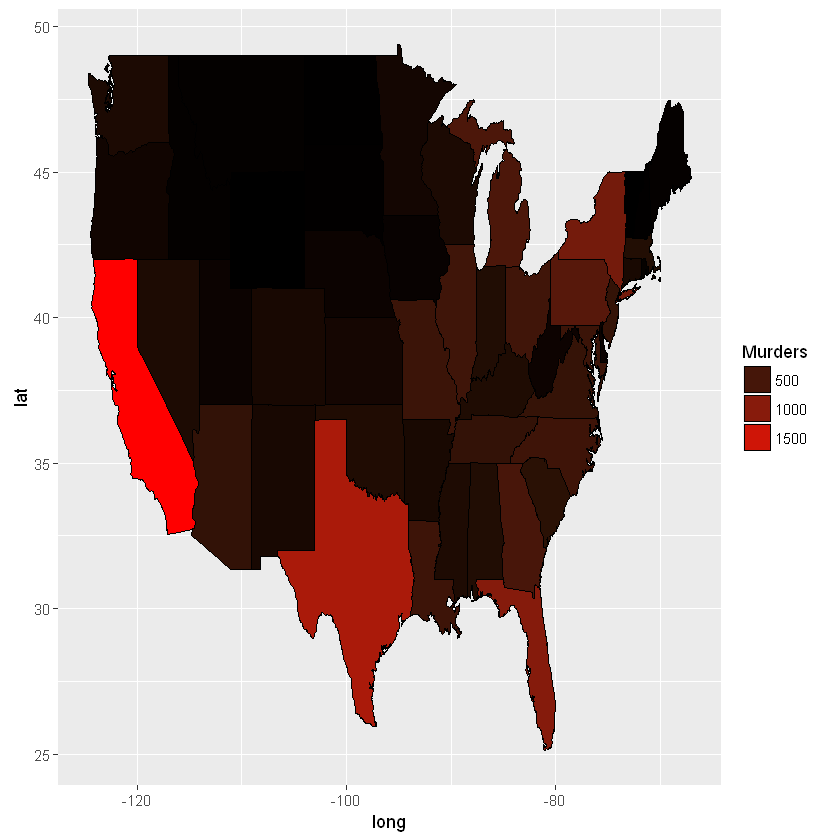

In [18]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=Murders)) +
geom_polygon(color="black") +
scale_fill_gradient(low="black", high="red", guide="legend")

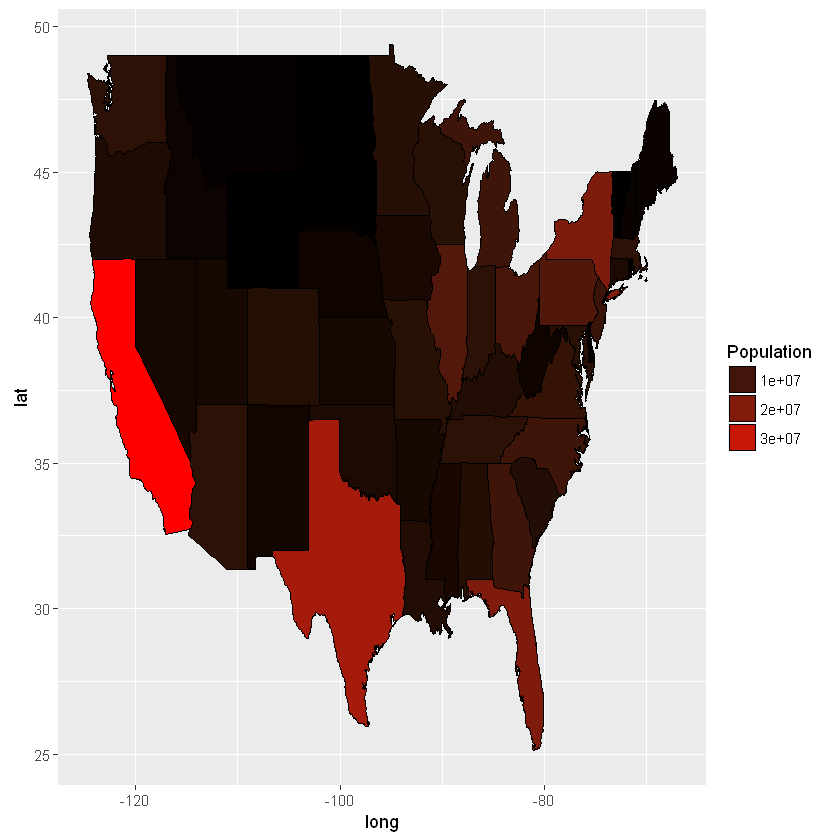

In [19]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=Population)) +
geom_polygon(color="black") +
scale_fill_gradient(low="black", high="red", guide="legend")

In [21]:
# number of murders per 100,000 population
murderMap$MurderRate <- murderMap$Murders / murderMap$Population*100000

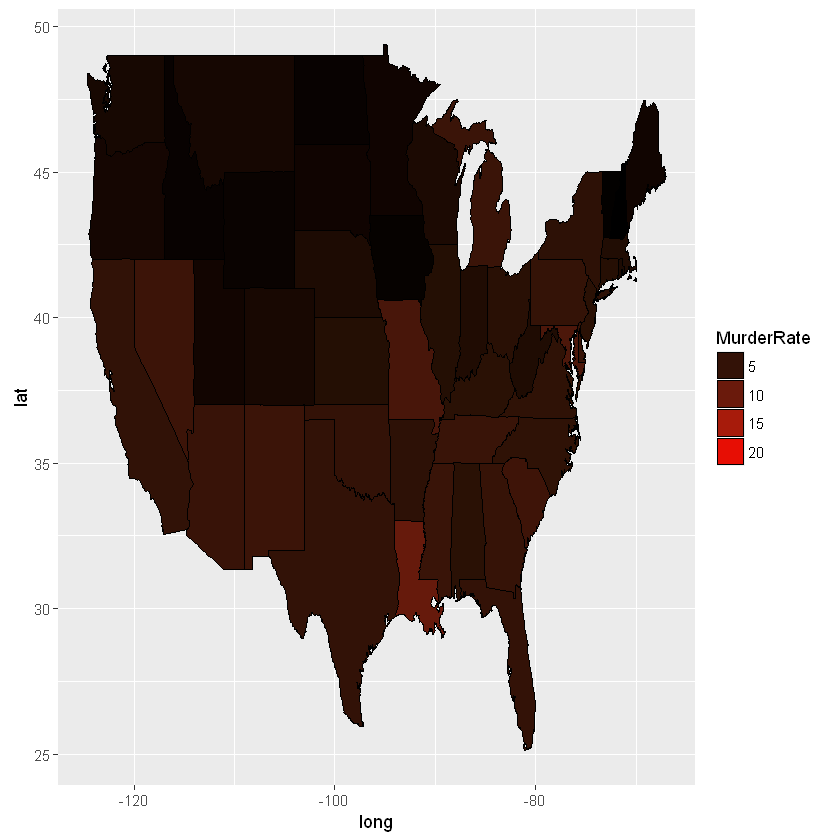

In [22]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=MurderRate)) +
geom_polygon(color="black") +
scale_fill_gradient(low="black", high="red", guide="legend")

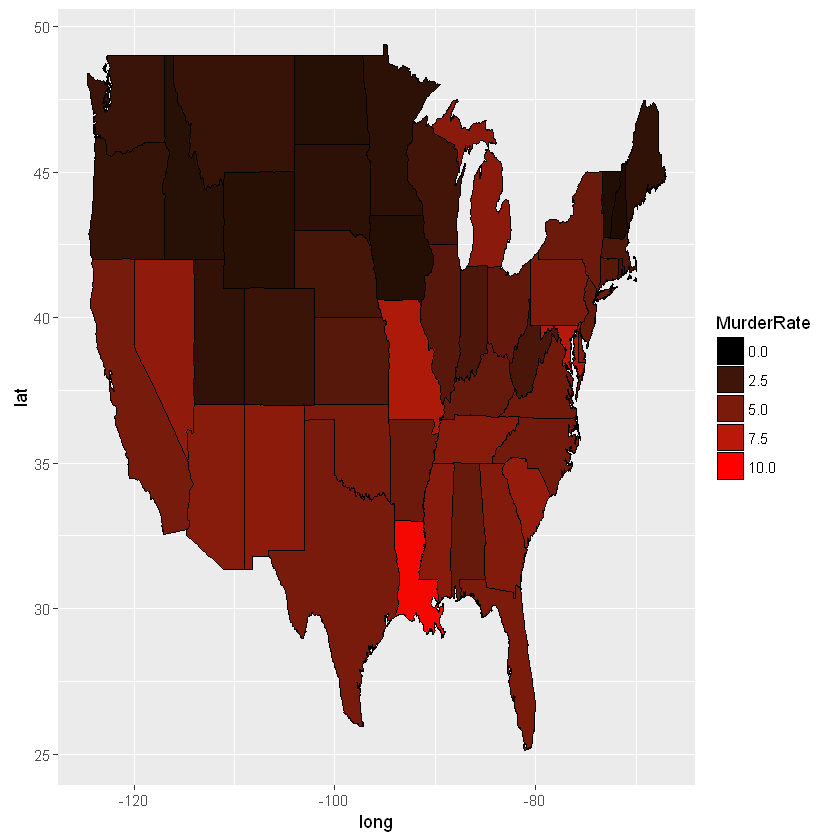

In [23]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=MurderRate)) +
geom_polygon(color="black") +
scale_fill_gradient(low="black", high="red", guide="legend", limits=c(0,10))

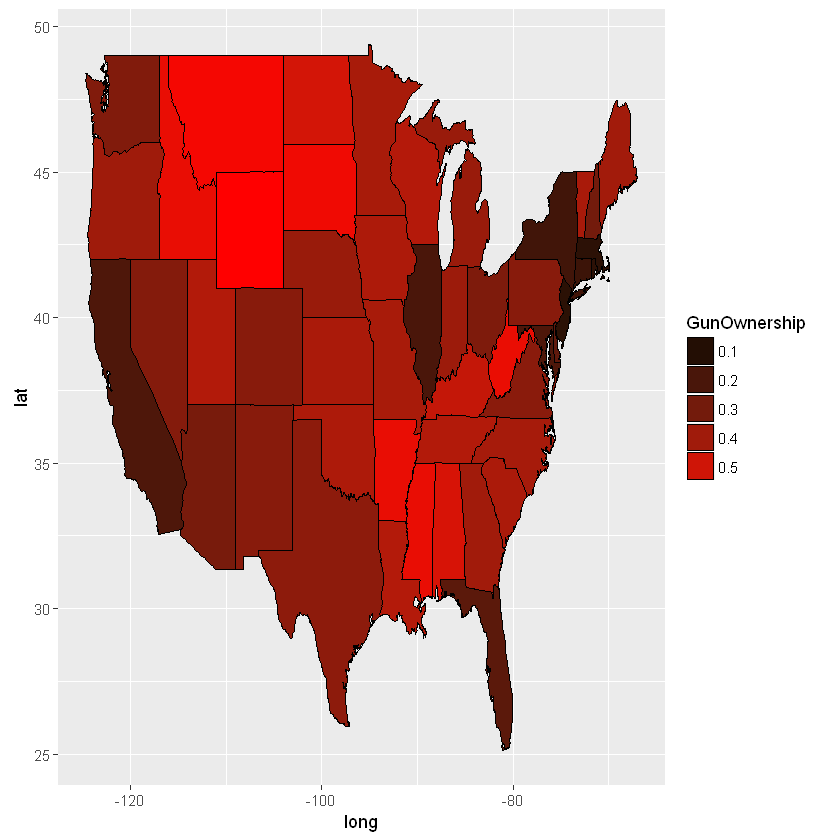

In [32]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=GunOwnership)) +
geom_polygon(color="black") +
scale_fill_gradient(low="black", high="red", guide="legend")